1390700


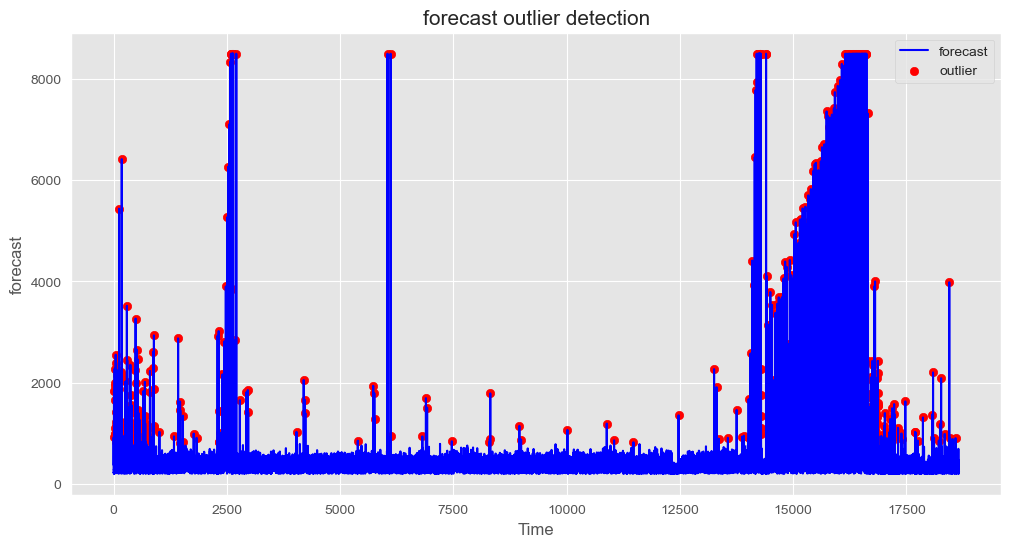

In [9]:
# 完整的代码示例

# 导入所需模块
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import time as Time
start = 0
end = 0
tflag = False

# 读取数据
file_path = 'HUAWEI_2.csv'
data = pd.read_csv(file_path)

# data = data[160:250]

# 计算异常值
if tflag != True:
        start = Time.perf_counter_ns()
Q1 = data['forecast'][:5000].quantile(0.25)
Q3 = data['forecast'][:5000].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# 标识异常值
data['forecast_Outlier'] = ((data['forecast'] < lower_bound) | (data['forecast'] > upper_bound))

if tflag != True:
        end = Time.perf_counter_ns()
        tflag = True
print(end - start)

# 创建折线图，并在其中标注异常值
plt.figure(figsize=(12, 6))

# 绘制OT值的折线图
sns.lineplot(data=data, x=data.index, y='forecast', label='forecast', color='blue')

# 标注异常值
outliers = data[data['forecast_Outlier']]
plt.scatter(outliers.index, outliers['forecast'], color='red', label='outlier')

plt.style.use('ggplot')

# 设置标题和标签
plt.title('forecast outlier detection', fontsize=15)
plt.xlabel('Time', fontsize=12)
plt.ylabel('forecast', fontsize=12)
plt.legend()

# 显示图表
plt.show()


In [10]:
TP = 0
TN = 0
FP = 0
FN = 0


for i, x in enumerate(data['forecast_Outlier']):
    if x == True and data['label'][i] == 1:
        TP += 1
    elif x == False and data['label'][i] == 1:
        FN += 1
    elif x == True and data['label'][i] == 0:
        FP += 1
    else:
        TN += 1


acc = (TP+TN) / (TP+TN+FP+FN)
print(acc)
precision = TP / (TP + FP)
print(precision)
recall = TP / (TP + FN)
print(recall)
print(2*(precision*recall)/(precision+recall))

0.9949630264709034
0.7882882882882883
1.0
0.8816120906801007
